In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

plt.style.use('default')
sns.set(style='darkgrid')

pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv('./data/data_cleaned.csv')

In [3]:
df.head()

,tPos_+ve_0.100000,tPos_+ve_0.200000,tPos_+ve_0.300000,tPos_+ve_0.400000,tPos_+ve_0.500000,tPos_+ve_0.600000,tPos_+ve_0.700000,tPos_+ve_0.800000,tPos_+ve_0.900000,tPos_+ve_0.910000,...,rpm_d1_+ve_0.920000,rpm_d1_+ve_0.930000,rpm_d1_+ve_0.940000,rpm_d1_+ve_0.950000,rpm_d1_+ve_0.960000,rpm_d1_+ve_0.970000,rpm_d1_+ve_0.980000,rpm_d1_+ve_0.990000,rpm_d1_-ve_std,rpm_d1_+ve_std
0,12.549020,13.725490,13.725490,14.117647,14.901961,16.078431,18.039216,20.392157,25.098039,25.776471,...,1215.89,1341.335,1482.620,1619.3875,1714.49,1831.0975,1962.19,2122.5575,577.335201,604.131676
1,12.941176,13.882353,14.509804,14.509804,14.901961,15.294118,16.078431,17.254902,19.725490,20.392157,...,646.27,833.320,887.480,988.4500,1115.74,1294.2200,1428.32,1474.1500,345.724384,326.814550
2,12.941176,14.117647,14.509804,15.294118,15.686275,17.254902,19.215686,21.960784,25.882353,26.666667,...,261.09,283.115,304.585,350.2875,403.51,498.0500,784.37,945.7900,180.690215,170.659882
3,12.549020,13.333333,13.725490,14.117647,14.117647,14.509804,15.686275,18.039216,21.215686,21.568627,...,279.71,303.500,333.230,372.6000,430.55,519.2500,651.86,881.0400,179.369146,170.978184
4,13.725490,14.117647,14.509804,15.529412,16.862745,18.431373,19.607843,20.784314,23.137255,23.529412,...,198.96,218.750,242.440,266.3500,304.45,357.0250,417.35,663.3900,165.112781,136.704562


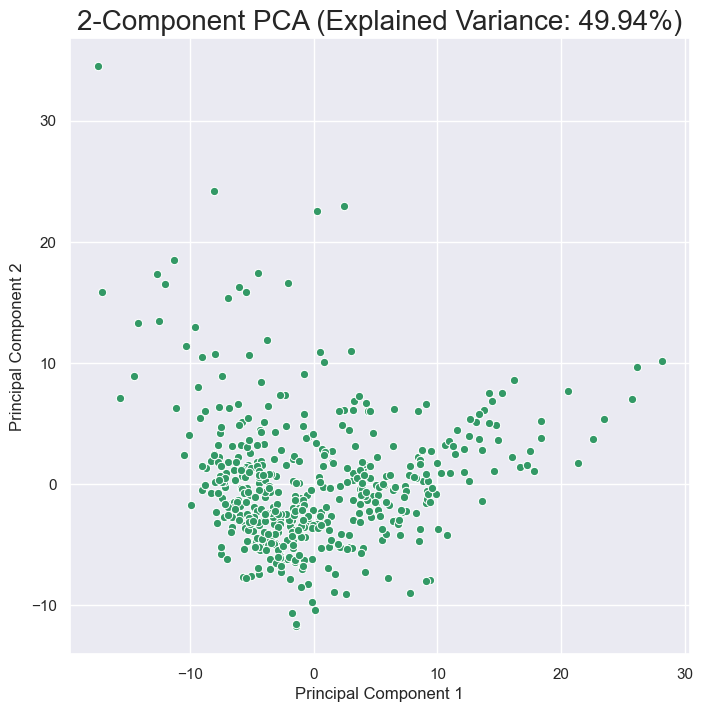

In [4]:
pca = PCA(n_components=2)
X_pca = df.values
X_pca = StandardScaler().fit_transform(X_pca)
components = pca.fit_transform(X_pca)
explained_variance = 100*sum(pca.explained_variance_ratio_)
df_pca = pd.DataFrame(data=components, columns=['Principal Component 1',
                                               'Principal Component 2'])


fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax, data=df_pca, x='Principal Component 1', y='Principal Component 2',
               color='#339966')
ax.set_title('2-Component PCA (Explained Variance: {:.2f}%)'.format(explained_variance), size=20)
plt.show()

In [5]:
pca_table = {
    'Num. Components' : [],
    'Explained Var.' : []
}

for k in range(1, 81):
    pca = PCA(n_components=k)
    X_pca = df.values
    X_pca = StandardScaler().fit_transform(X_pca)
    components = pca.fit_transform(X_pca)
    explained_variance = sum(pca.explained_variance_ratio_)
    pca_table['Num. Components'].append(k)
    pca_table['Explained Var.'].append(explained_variance)

df_pca_table = pd.DataFrame(pca_table)
df_pca_table

,Num. Components,Explained Var.
0,1,0.310502
1,2,0.499375
2,3,0.629588
3,4,0.721923
4,5,0.754057
5,6,0.785468
6,7,0.810490
7,8,0.833212
8,9,0.850154
9,10,0.863837


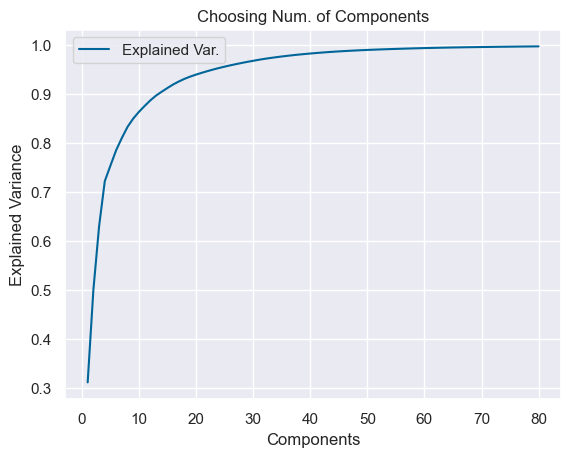

In [6]:
df_pca_table.plot(x='Num. Components', y='Explained Var.',
                 color='#006699')
plt.title('Choosing Num. of Components')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

In [7]:
# choose n=50 to achieve 99% retention of variance
pca = PCA(n_components=50)
X_pca = df.values
X_pca = StandardScaler().fit_transform(X_pca)
X = pca.fit_transform(X_pca)

In [8]:
wcss = []
silhouette_coefficients = []

min_cluster = 2
max_cluster = 30

for k in range(min_cluster, max_cluster+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(sil_score)
    
knee_loc = KneeLocator(range(min_cluster, max_cluster+1), wcss,
                      curve='convex', direction='decreasing')


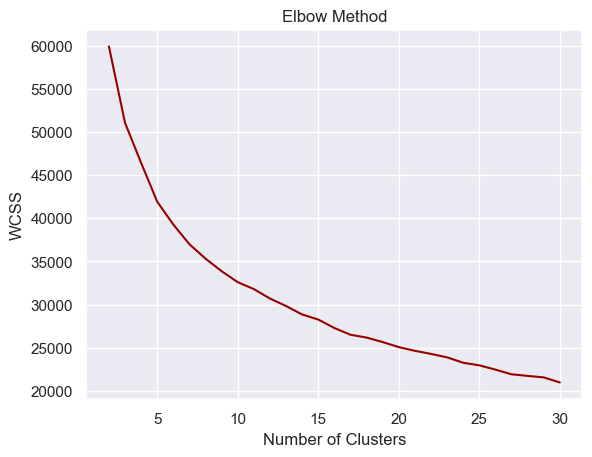

In [9]:
plt.plot(range(min_cluster, max_cluster+1), wcss,
        color='#990000')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
knee_loc.elbow

9

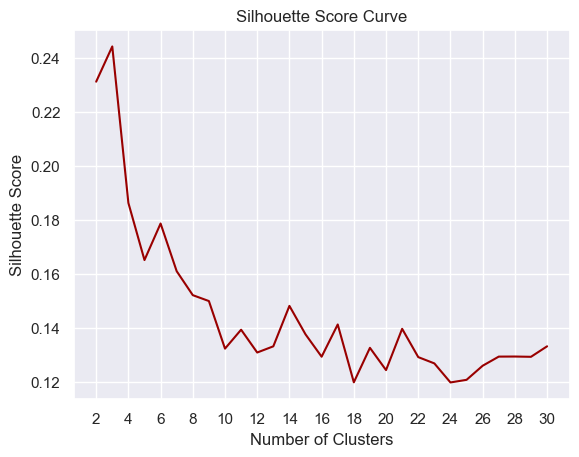

In [11]:
plt.plot(range(min_cluster, max_cluster+1), silhouette_coefficients,
        color='#990000')
plt.xticks(range(min_cluster, max_cluster+1, 2))
plt.title('Silhouette Score Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
# choose 3 clusters